In [2]:
using Pkg
using Distributions
using Plots

In [51]:
threshold = 1
L = 1_000
increament = 0.499
decreament = 1
maxSteps = 20000;
adding = 0.1

0.1

In [52]:
1/L,increament,decreament,decreament-2*increament

(0.001, 0.499, 1, 0.0020000000000000018)

In [34]:
lattice = rand(Uniform(0,threshold), L);

In [32]:
function getHist(avalanchesData)
    sortedValues = collect(Set(avalanchesData))
    sort!(sortedValues)

    counts = zeros(length(sortedValues))

    for i in 1:length(sortedValues)
        counts[i] = count(j->(j== sortedValues[i]), avalanchesData)
    end
    return counts,sortedValues
end

getHist (generic function with 1 method)

In [24]:
lattice[A[1]]

1.1645958807420584

In [35]:
function stepProcess(lattice)
    while true
    A = [Int(floor(rand(Uniform(1,L+0.9999))))]
    lattice[A[1]] += adding
    if lattice[A[1]] >= threshold
        return fall(lattice,A)
    end
end
end


stepProcess (generic function with 1 method)

In [36]:
function fall(lattice,A)
    # if lattice[A[1]] < threshold
    #     return lattice,0
    # end
    nFalls = 1
    B = []
    while length(A)+length(B) != 0 
        lattice,B = check(lattice,A)
        lattice,A = check(lattice,B)  

        nFalls += length(A)+length(B)

        if nFalls > maxSteps
            println("reached to the max")
            break

        end

    end

    return lattice,nFalls

end

fall (generic function with 1 method)

In [37]:
# lattice = Int.(floor.(rand(Uniform(0,threshold), L)));

In [38]:
function runProcess(lattice,steps)
    dataSet = zeros(steps)

    for _ in 1:10000
        lattice , data = stepProcess(lattice)

    end

    for i in 1:steps
        lattice , data = stepProcess(lattice)
        dataSet[i] = data
        # if i % (div(steps,100)) == 0
        #     println(i/(div(steps,100)))
        # end
    
    end 

    return dataSet,lattice

end

runProcess (generic function with 1 method)

In [39]:
function check(lattice,points)
    out = []
    for idx in points
        while(lattice[idx] >= threshold)
            lattice[idx] -= decreament 

            if idx < L
                lattice[idx+1] += increament 
                if lattice[idx+1] >= threshold
                    push!(out,idx+1)
                end
            end
                        
            if idx > 1 
                lattice[idx-1] += increament 
                if lattice[idx-1] >= threshold
                    push!(out,idx-1)
                end
            end
        end
    end
    return lattice,out  
end  

check (generic function with 1 method)

In [40]:
dataSet,lattice2 = runProcess(lattice,1_000_000)

([33.0, 712.0, 56.0, 222.0, 236.0, 151.0, 5.0, 240.0, 1135.0, 392.0  …  762.0, 198.0, 210.0, 34.0, 488.0, 192.0, 147.0, 198.0, 40.0, 27.0], [0.5990973158476085, 0.8678289583592415, 0.7462676738888907, 0.8289970494561753, 0.9439838198728762, 0.9494118420791361, 0.850536894818411, 0.6529882321728605, 0.9231808481146367, 0.6667067388664386  …  0.6973789490506296, 0.661430232355142, 0.6336211087346381, 0.9029701203383026, 0.919582398006127, 0.9964471348907072, 0.8871279659705932, 0.9728214678281162, 0.5620348223215171, 0.8433650249660591])

In [44]:
dataSet = convert(Array{Int}, dataSet);

In [45]:
counts ,bins  = getHist(dataSet)

([804.0, 1875.0, 1970.0, 2930.0, 2075.0, 3953.0, 2121.0, 4180.0, 3164.0, 4246.0  …  1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2553, 2566, 2578, 2581, 2592, 2642, 2846, 2853, 3107, 3349])

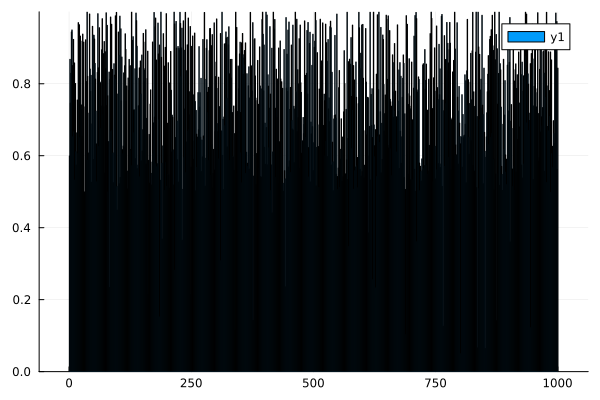

In [46]:
p = bar(collect(1:L),lattice)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(p)

In [48]:
counts ,bins = getHist(dataSet)

([804.0, 1875.0, 1970.0, 2930.0, 2075.0, 3953.0, 2121.0, 4180.0, 3164.0, 4246.0  …  1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2553, 2566, 2578, 2581, 2592, 2642, 2846, 2853, 3107, 3349])

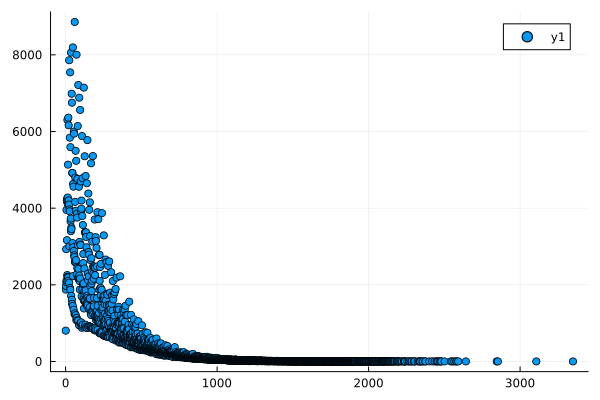

In [49]:
q = scatter(bins,counts)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

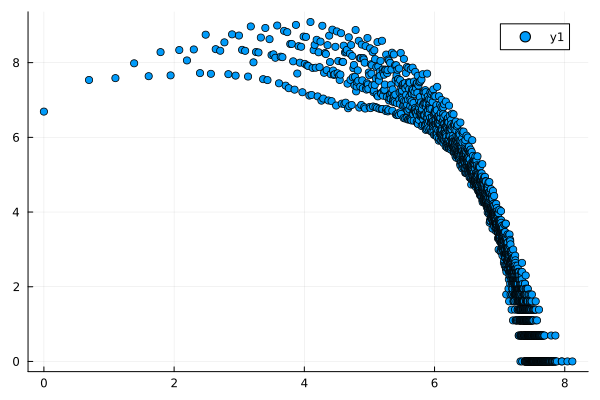

In [50]:
q = scatter(log.(bins),log.(counts))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

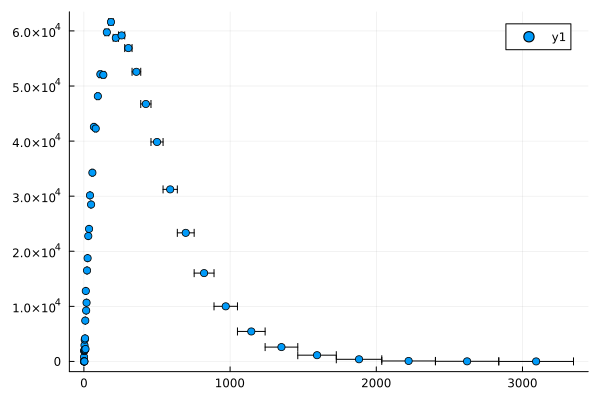

In [53]:
a = scatterhist(dataSet,bins= exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

In [55]:
using StatsBase

In [56]:
h = fit(Histogram, dataSet, exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

Histogram{Int64, 1, Tuple{Vector{Float64}}}
edges:
  [1.0, 1.1801495464780616, 1.3927529520523747, 1.6436567647205917, 1.9397607854506043, 2.2892078112254595, 2.7016075602117624, 3.1883009369456143, 3.7626719047719455, 4.440515541962356  …  754.1917077763467, 890.05900188977, 1050.4027274189289, 1239.6323023827674, 1462.951499456579, 1726.5015486030816, 2037.5300195775988, 2404.5901285399386, 2837.775949662034, 3348.9999999999986]
weights: [804, 0, 0, 0, 1875, 0, 1970, 0, 2930, 2075  …  23341, 16035, 10003, 5441, 2603, 1132, 392, 87, 18, 3]
closed: left
isdensity: false

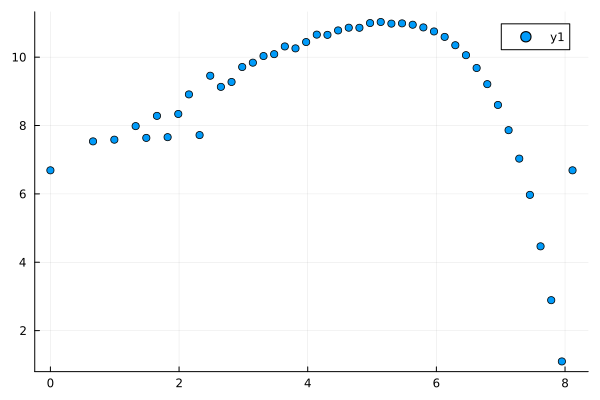

In [57]:
q = scatter(log.(h.edges[1]),log.(h.weights))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

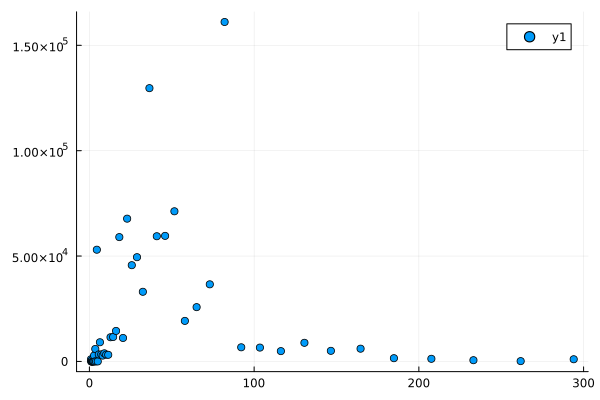

In [54]:
q = scatter(h.edges[1],h.weights)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)